* [TinyDB Docs](https://tinydb.readthedocs.io/en/latest/usage.html)
* [Pillow docs](https://pillow.readthedocs.io/en/stable/)

In [57]:
from tinydb import TinyDB, Query
import webbrowser
from collections import Counter
from IPython.core.display import display, HTML

In [32]:
import json
from collections import Counter

STOP_WORDS = ['Detroit', 'Cleveland', 'Akron', 'Ohio', 'Allegheny', 'Cuyahoga', 'Summit County', 'Wayne County', 'Michigan' ]
KEEP_WORDS = ['Chicago', 'Cook County', 'Illinois']

def source_filter(doc_json):
    for word in STOP_WORDS:
        if word.lower() in doc_json['source'].lower():
            return False
    return True

def inverse_source_filter(doc_json):
    return not(source_filter(doc_json))
    
docs = json.load(open('../data/DocumentCloud/documents.json'))
# c = Counter(x['source'] for x in filter(source_filter, docs))
# sorted(c)
chicago_docs = filter(source_filter,docs)
json.dump(list(chicago_docs),open("../data/DocumentCloud/filtered_documents.json",'w'))

        

In [29]:
c.most_common()

[('Cook County Government', 3404),
 ('Chicago City Council', 3144),
 ('Chicago Housing Authority', 2187),
 ('Cook County Health and Hospitals System', 1744),
 ('Chicago Department of Planning and Development', 1376),
 ('Metropolitan Water Reclamation District of Greater Chicago', 908),
 ('Cook County Forest Preserves District', 788),
 ('Illinois Gaming Board', 683),
 ('Chicago Transit Authority', 380),
 ('Illinois Labor Relations Board', 372),
 ('Chicago Public Schools', 293),
 ('Cook County Pension Fund', 291),
 ('Illinois Department of Public Health', 253),
 ('Chicago Special Service Area #33 Wicker Park/Bucktown', 193),
 ('Illinois Criminal Justice Information Authority', 192),
 ('Chicago Park District', 187),
 ("Municipal Employees' Annuity and Benefit Fund of Chicago", 178),
 ('Cook County Board of Commissioners', 149),
 ("Chicago Firemen's Annuity and Benefit Fund", 142),
 ('Public Building Commission of Chicago', 133),
 ("Policemen's Annuity and Benefit Fund of Chicago", 133),
 

In [5]:
docs[0]

{'id': '6572198-Committee-on-License-and-Consumer-Protection',
 'title': 'Committee on License and Consumer Protection 2019-12-12 - Notice',
 'access': 'public',
 'pages': 1,
 'description': None,
 'source': 'Chicago City Council',
 'created_at': 'Tue, 10 Dec 2019 12:34:30 +0000',
 'updated_at': 'Tue, 10 Dec 2019 12:34:35 +0000',
 'canonical_url': 'https://www.documentcloud.org/documents/6572198-Committee-on-License-and-Consumer-Protection.html',
 'language': 'eng',
 'file_hash': '25511fc244dab7114fd8d94721bea4b14b225716',
 'display_language': 'eng',
 'resources': {'pdf': 'https://assets.documentcloud.org/documents/6572198/Committee-on-License-and-Consumer-Protection.pdf',
  'text': 'https://assets.documentcloud.org/documents/6572198/Committee-on-License-and-Consumer-Protection.txt',
  'thumbnail': 'https://assets.documentcloud.org/documents/6572198/pages/Committee-on-License-and-Consumer-Protection-p1-thumbnail.gif',
  'search': 'https://www.documentcloud.org/documents/6572198/search.

In [30]:
db = TinyDB('../data/DocumentCloud/db.json')
empty_file_ids = !find ../data/DocumentCloud/text -size 0 | awk -F/ '{print $5}' | awk -F. '{print $1}'
recs = db.search(Query().id.one_of(empty_file_ids))

In [53]:
Counter(x['pages'] for x in recs).most_common(10)

[(1, 54),
 (2, 30),
 (3, 18),
 (7, 13),
 (4, 13),
 (11, 9),
 (10, 8),
 (5, 6),
 (14, 5),
 (8, 4)]

In [124]:
class DocDisplayWidget:
    def __init__(self, data):
        self.data = data
    def _repr_html_(self):
        html = f"""
        <div style="display: inline-grid; width: 200px">
        <a href=\"{self.data['canonical_url']}\"><img style="border: 1px solid black" src="{self.data['resources']['thumbnail']}"></a>
        {self.data['title']} <a href=\"{self.data['resources']['text']}\">[ TXT ]</a> 
        </div>
        """
        return html
    def __repr__(self):
        return f"{self.data['title']} ({self.data['id']})"

    
class DocList:
    def __init__(self,docs=None):
        if docs is None:
            docs = []
        self.docs = docs
    def add(self, doc):
        self.docs.append(doc)
    def _repr_html_(self):
        concat = " ".join(x._repr_html_() for x in self.docs)
        return f"<div style='display: grid;'>{concat}</div>"

DocList([DocDisplayWidget(x) for x in recs[:3]])    

In [ ]:
import requests
from PIL import Image
from io import BytesIO


def getimage(doc):
    """Return the colors for the thumbnail in this document record"""
    thumb_url = doc['resources']['thumbnail']
    r = requests.get(thumb_url)
    i = Image.open(BytesIO(r.content))
    return i

for x in recs:
    x['image'] = getimage(x)
    print(x['title'])
    

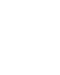

Six Corners Commission 2019-12-02 - Agenda


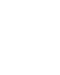

Board of Directors 2019-07-18 - Minutes


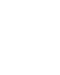

Annual Board of Directors Meeting 2019-01-29 - Minutes


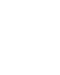

Board of Directors 2019-05-16 - Agenda


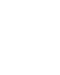

Board of Directors Special Meeting 2019-09-05 - Agenda


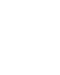

Board of Directors 2019-07-18 - Agenda


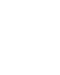

Board of Directors Meeting and Retreat 2019-03-29 - Agenda


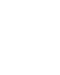

Board of Directors 2019-05-16 - Minutes


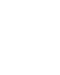

Annual Board of Directors Meeting 2019-01-29 - Agenda


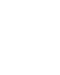

Board of Directors Special Meeting 2019-09-05 - Minutes


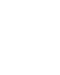

Board of Directors Meeting and Retreat 2019-03-29 - Minutes


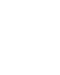

Board of Directors 2019-11-21 - Agenda


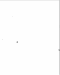

Detroit City Council Formal Session 2019-11-12 - PED FORMAL AGENDA REFERRAL 11-12-2019.Pdf


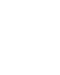

Six Corners Commission 2019-10-17 - Agenda


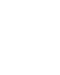

Six Corners Commission 2019-07-11 - Agenda


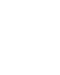

Six Corners Commission 2019-07-11 - Minutes


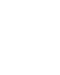

Six Corners Commission 2019-04-18 - Minutes


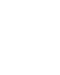

Six Corners Commission 2019-04-18 - Agenda


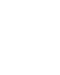

Six Corners Commission 2019-01-17 - Minutes


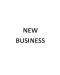

New Business Council Session 2019-01-15 - NEW BUSINESS VOTING 1-15-19.Pdf


20

In [174]:
# '6544125-Detroit-City-Council-Formal-Session-2019-11-12' has 11 colors, but one of them is 96% of pixels in the thumbnail and clearly doesn't have naything interesting
# find more like that.
chk = []
for i,x in enumerate(recs):
    for count, color in x['image'].getcolors():
        if count / 4500 > .96:
            chk.append(x)
            display(x['image'])
            print(x['title'])
len(chk)

In [162]:
len(recs[14]['image'].getcolors())

11

In [115]:
# TODO: maybe something more than colors, because there are a couple that are nearly blank but have 
# just a little schmutz in them, like...
DocDisplayWidget(chk[2])

Detroit City Council Formal Session 2019-11-12 - PED FORMAL AGENDA REFERRAL 11-12-2019.Pdf (6544125-Detroit-City-Council-Formal-Session-2019-11-12)

In [111]:
DocList([DocDisplayWidget(x) for x in chk[10:20]])